# LSST Camera Field-of-View and other Sorcha 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

The aim of this notebook is to show the various on-sky radii used in Sorcha and show them in comparison to the the LSST Camera (LSSTCam) field-of-view (FOV) and detector schematics. 

First let's read in the default internal LSST detector configuration file provided within Sorcha

In [2]:
df = pd.read_csv('../../src/sorcha/modules/data/LSST_detector_corners_100123.csv')

The file has the corners of each CCD within the LSSTCam.

In [3]:
chips = df['detector'].unique() # getting the list of detector IDs

Loop through the CCD detectors and plot the corners of the LSSTCam plus the Assist+Rebound Ephemeris search radius + buffer, 2.06 degree radius circle (the full radius circle for LSSTCam FOV), and 1.75 degee radius cirle (contains 90% of the LSSTCam FOV). 

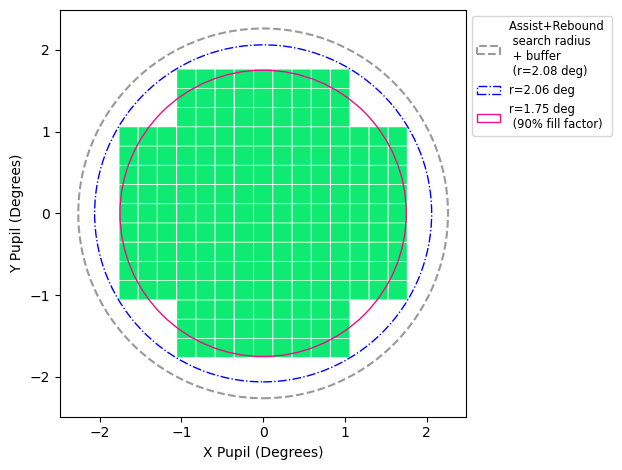

In [4]:
f =plt.figure()
ax = f.add_subplot(111)
for CCD in chips:
    w=df['detector'] ==CCD
    corners=df[w].copy()
    plt.fill(corners['x']*180/3.14, corners['y']*180/3.14, fc='#0fea72')

circle1=Circle((0, 0), radius=2.06, edgecolor="blue", fc='none', linewidth=1.0, linestyle='dashdot')
ax.add_patch(circle1)
circle2=Circle((0, 0), radius=1.75, edgecolor="#ea0f87", fc='none', linewidth=1.0)
ax.add_patch(circle2)
circle3=Circle((0, 0), radius= 2.06+0.2, edgecolor="#999999", fc='none', linestyle='--', linewidth=1.5)
ax.add_patch(circle3) 


plt.gca().set_aspect("equal")


plt.xlabel("X Pupil (Degrees)")
plt.ylabel("Y Pupil (Degrees)")

plt.legend([circle3,circle1,circle2], ["Assist+Rebound \n search radius \n + buffer \n (r=2.08 deg)","r=2.06 deg", "r=1.75 deg \n (90% fill factor)"], bbox_to_anchor=(1.0, 1.0),fontsize='small', fancybox=True)
plt.tight_layout()
#plt.savefig("sorcha_fovs.pdf")